# Adaline

## Algoritma
---

_**Step 0**_ Inisialisasi bobot dan bias <br>
$\hspace{1.1cm}$ Set *learning rate* $\alpha$ <br>
_**Step 1**_ Ketika kondisi berhenti bernilai *false*, kerjakan _Step 2-6_ <br>
$\hspace{1.1cm}$_**Step 2**_ Untuk setiap pasangan pembelajaran bipolar $s:t$, kerjakan _Step 3-5_ <br>
$\hspace{2.3cm}$_**Step 3**_ Set aktivasi unit input <br>
$\hspace{3.5cm}$ $x_i=s_i$ <br>
$\hspace{2.3cm}$_**Step 4**_ Hitung respon untuk unit output <br>
$\hspace{3.5cm}$ $y_{in}=b+\sum\limits_{i}x_iw_i$ <br>
$\hspace{2.3cm}$_**Step 5**_ Perbarui bobot dan bias <br>
$\hspace{3.5cm}$ $w_i(baru)=w_i(lama)+\alpha (t-y_{in})x_i$, <br>
$\hspace{3.5cm}$ $b(baru)=b(lama)+\alpha (t-y_{in})$ <br>
$\hspace{1.1cm}$_**Step 6**_ Tes kondisi berhenti <br>
$\hspace{2.3cm}$ Jika perubahan bobot terbesar pada _Step 2_ lebih kecil dari toleransi, <br>
$\hspace{2.3cm}$ maka berhenti

---

## Impementasi Algoritma

##### 1. Mengimport library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Algoritma Adaline

In [2]:
def Adaline(s,t,max_epoch,learning_rate=0.1,tol=0.005):
    # Step 0
    w = np.random.uniform(0,2,s.shape[1])
    b = 0
    epoch = 1
    stop = 0
    
    # Step 1
    while epoch < max_epoch:
        # Step 2
        for i in range(s.shape[0]):
            # Step 3
            x = s[i,:]
            
            # Step 4
            y_in = b + sum(x*w)

            temp_w = np.copy(w)
            temp_b = np.copy(b)
            
            # Step 5
            w += learning_rate*(t[i]-y_in)*x
            b += learning_rate*(t[i]-y_in)
                
            dw = w - temp_w
            db = b - temp_b
            
            temp = np.append(dw,[stop,db])
            stop = max(temp)
            
        # Step 6
        if stop < tol:
            break
            
        epoch += 1
    return w,b

##### 3. Testing algoritma Adaline

In [3]:
def PredictAdaline(x_input,weight,bias):
    y_in = bias + sum(x_input*weight)
    
    if y_in >= 0:
        y = 1
    else:
        y = -1
        
    return y

##### 4. Ploting garis batas keputusan

In [4]:
def PlotAdaline(x_unit,target,weight,bias,title=""):
    # Plot titik
    color = {-1:"r",1:"b"}
    sns.scatterplot(x_unit[:,0],x_unit[:,1],hue=target,s=200,legend="full",palette=color)
    
    # Plot sumbu-x dan sumbu-y
    plt.hlines(0,-2,2)
    plt.vlines(0,-2,2)
    
    # Plot persamaan garis
    x = np.array([-2,2])
    m = -weight[0]/weight[1]
    n = -bias/weight[1]
    y = m*x + n
    plt.plot(x,y,"g-")
    
    plt.title("Adaline "+title)
    plt.legend(title="Target")
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xticks([])
    plt.yticks([])

## Contoh Soal

### Contoh 1: Metode Adaline untuk input bipolar dan target bipolar menggunakan fungsi logika AND NOT

Untuk input bipolar dan target bipolar menggunakan fungsi logika AND NOT menghasilkan tabel berikut ini 

$$\begin{align*}
\text{Input}&&\text{Target}\\
1\hspace{0.5cm}1&&\text{-}1\hspace{0.38cm}\\
1\hspace{0.35cm}\text{-}1&&1\hspace{0.38cm}\\
\text{-}1\hspace{0.5cm}1&&\text{-}1\hspace{0.38cm}\\
\text{-}1\hspace{0.35cm}\text{-}1&&\text{-}1\hspace{0.38cm}\\
\end{align*}
$$

Diberikan _learning rate_ ($\alpha=0.2$), toleransi = 0.05, dan maksimum _epoch_ adalah 100.

##### Implementasi algoritma Adaline

In [5]:
# Input
x1 = np.array([[1,1],
                [1,-1],
                [-1,1],
                [-1,-1]])
# Target
t1 = np.array([-1,1,-1,-1])

# Perhitungan bobot dan bias dengan metode adaline
w1,b1 = Adaline(x1,t1,100,learning_rate=0.2,tol=0.05)

# Prediksi target
pred1 = [PredictAdaline(x,w1,b1) for x in x1]

##### Analisis hasil prediksi

In [6]:
for i in range(len(pred1)):
    print("Input",x1[i,:],"\tmemiliki target:",t1[i],"\thasil prediksi:",pred1[i])

Input [1 1] 	memiliki target: -1 	hasil prediksi: -1
Input [ 1 -1] 	memiliki target: 1 	hasil prediksi: 1
Input [-1  1] 	memiliki target: -1 	hasil prediksi: -1
Input [-1 -1] 	memiliki target: -1 	hasil prediksi: -1


##### Visualisasi garis batas keputusan untuk input

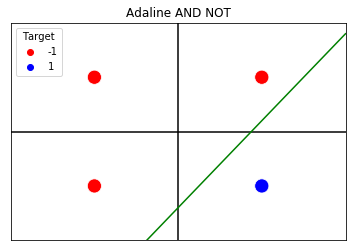

In [7]:
PlotAdaline(x1,t1,w1,b1,title="AND NOT")

### Contoh 2: Metode Adaline untuk input biner dan target bipolar menggunakan fungsi logika AND

Untuk input biner dan target bipolar menggunakan fungsi logika AND menghasilkan tabel berikut ini 

$$\begin{align*}
\text{Input}&&\text{Target}\\
1\hspace{0.5cm}1&&1\hspace{0.38cm}\\
1\hspace{0.5cm}0&&\text{-}1\hspace{0.38cm}\\
0\hspace{0.5cm}1&&\text{-}1\hspace{0.38cm}\\
0\hspace{0.5cm}0&&\text{-}1\hspace{0.38cm}\\
\end{align*}
$$

Diberikan _learning rate_ ($\alpha=0.3$), toleransi = 0.005, dan maksimum _epoch_ adalah 1000.

##### Implementasi algoritma Adaline

In [8]:
# Input
x2 = np.array([[1,1],
                [1,0],
                [0,1],
                [0,0]])
# Target
t2 = np.array([1,-1,-1,-1])

# Perhitungan bobot dan bias dengan metode adaline
w2,b2 = Adaline(x2,t2,1000,learning_rate=0.3,tol=0.005)

# Prediksi target
pred2 = [PredictAdaline(x,w2,b2) for x in x2]

##### Analisis hasil prediksi

In [9]:
for i in range(len(pred2)):
    print("Input",x2[i,:],"\tmemiliki target:",t2[i],"\thasil prediksi:",pred2[i])

Input [1 1] 	memiliki target: 1 	hasil prediksi: 1
Input [1 0] 	memiliki target: -1 	hasil prediksi: -1
Input [0 1] 	memiliki target: -1 	hasil prediksi: -1
Input [0 0] 	memiliki target: -1 	hasil prediksi: -1


##### Visualisasi garis batas keputusan untuk input

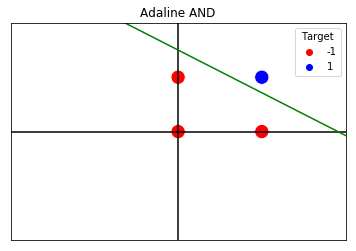

In [10]:
PlotAdaline(x2,t2,w2,b2,title="AND")

### Catatan:
Metode Adaline tidak bisa digunakan untuk logika XOR dan XNOR

## Daftar Pustaka

[1] $\hspace{0.5cm}$ L. Fausett, _Fundamentals of Neural Networks_. Prentice Hall, 1994